In [1]:
#all imports
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('forPredictions/2026predictedparkingdata_streamlined.csv')
df.head()



,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 4 General Spaces,LOT 4 Premium % Capacity,LOT 4 Premium Occupied,LOT 4 Premium Spaces,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces
0,1/1/2026,Thursday,0.530032,646.075655,1216.45,0.642703,227.249131,334.71,0.493002,587.658841,...,1430,0.931075,327.659944,350.98,0.305309,597.694310,2248.96,0.568056,752.616957,1337
1,1/2/2026,Friday,0.517110,630.321667,1216.45,0.584489,208.963359,334.71,0.548324,653.602024,...,1430,0.866275,304.909893,350.98,0.323964,644.625508,2248.96,0.586096,779.915784,1337
2,1/3/2026,Saturday,0.502847,612.931377,1216.45,0.574915,205.789302,334.71,0.521894,622.097187,...,1430,0.886005,311.811210,350.98,0.333380,667.450149,2248.96,0.599946,797.934282,1337
3,1/4/2026,Sunday,0.493926,602.059103,1216.45,0.540425,193.523395,334.71,0.512278,610.634885,...,1430,0.855927,301.353857,350.98,0.363384,701.573452,2248.96,0.543159,733.030535,1337
4,1/5/2026,Monday,0.509009,620.448631,1216.45,0.581750,207.500111,334.71,0.462121,550.595239,...,1430,0.885487,311.687121,350.98,0.344579,584.764167,2248.96,0.529568,699.732262,1337


In [56]:
facility_avg = df['Total % Capacity'].mean() * 100
print(f"Facility Average Occupancy: {facility_avg:.2f}%")

Facility Average Occupancy: 58.98%


In [58]:
# Lot columns
lot_occ_cols = [
    'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
    'LOT 3 Occupied', 'LOT 4 General Occupied',
    'LOT 4 Premium Occupied', 'LOT 5 Occupied',
    'LOT 6 Occupied'
]

lot_space_cols = [
    'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
    'LOT 3 Spaces', 'LOT 4 General Spaces',
    'LOT 4 Premium Spaces', 'LOT 5 Spaces',
    'LOT 6 Spaces'
]

# Total facility occupancy %
total_occ = df[lot_occ_cols].sum().sum()
total_space = df[lot_space_cols].sum().sum()
facility_pct = total_occ / total_space * 100

print(f"Total Facility Average Occupancy: {facility_pct:.2f}%")


Total Facility Average Occupancy: 58.99%


In [60]:
r = df.sample(n=10)
r

,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Occupied,Total Spaces,Total % Capacity,Month
188,2026-07-08,Wednesday,0.735393,892.766603,1214.00,0.861885,297.430155,345.00,0.557543,664.591020,...,0.478277,1100.140607,2296.00,0.527695,705.527921,1337,4959.718833,8164.0,0.607511,2026-07
20,2026-01-21,Wednesday,0.500894,610.561206,1216.45,0.641922,226.577730,334.71,0.456183,545.873234,...,0.299048,546.702048,2248.96,0.531274,702.984746,1337,4094.813893,8110.1,0.504903,2026-01
141,2026-05-22,Friday,0.736307,893.914417,1214.00,0.764201,263.682195,345.00,0.646807,770.993778,...,0.524583,1212.131242,2296.00,0.559661,748.266811,1337,5178.284775,8164.0,0.634283,2026-05
361,2026-12-28,Monday,0.583211,708.018480,1214.00,0.800807,278.996512,345.00,0.563723,671.958365,...,0.465439,1072.164929,2296.00,0.502740,672.163480,1337,4571.361917,8164.0,0.559941,2026-12
345,2026-12-12,Saturday,0.637156,773.506885,1214.00,0.838047,290.273417,345.00,0.745572,888.722254,...,0.592329,1362.852294,2296.00,0.574506,768.114421,1337,5203.543984,8164.0,0.637377,2026-12
160,2026-06-10,Wednesday,0.713987,866.780298,1214.00,0.889469,306.870226,345.00,0.561966,669.862964,...,0.461533,1071.502357,2296.00,0.526653,704.134774,1337,5177.401499,8164.0,0.634175,2026-06
336,2026-12-03,Thursday,0.593469,720.471806,1214.00,0.843169,290.949968,345.00,0.657385,783.603214,...,0.490793,1132.515940,2296.00,0.522237,698.230544,1337,5043.868091,8164.0,0.617818,2026-12
166,2026-06-16,Tuesday,0.652159,791.721012,1214.00,0.861073,297.081583,345.00,0.535604,638.440290,...,0.449322,1034.379008,2296.00,0.503926,673.748770,1337,4929.750694,8164.0,0.603840,2026-06
340,2026-12-07,Monday,0.583211,708.018480,1214.00,0.800807,278.996512,345.00,0.563723,671.958365,...,0.465439,1072.164929,2296.00,0.502740,672.163480,1337,4571.361917,8164.0,0.559941,2026-12
263,2026-09-21,Monday,0.583211,708.018480,1214.00,0.800807,278.996512,345.00,0.563723,671.958365,...,0.465439,1072.164929,2296.00,0.502740,672.163480,1337,4571.361917,8164.0,0.559941,2026-09


In [62]:
len(df[df['LOT 5 % Capacity'] < 0.1])

0

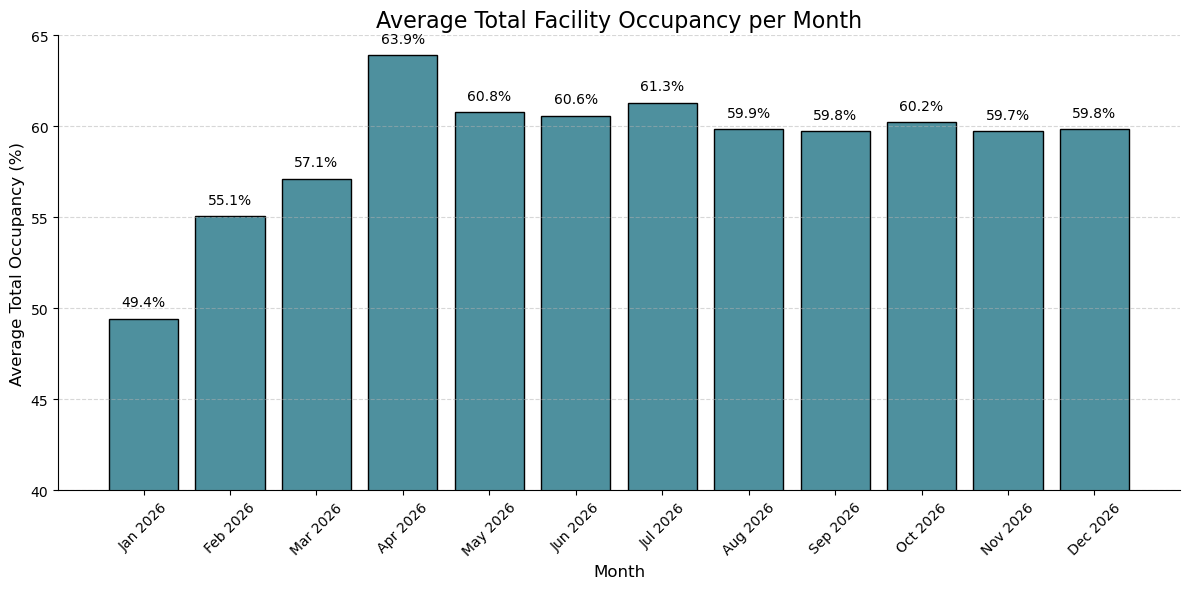

In [64]:

# --- Ensure datetime ---
df['Date'] = pd.to_datetime(df['Date'])

# --- Compute total occupancy across all lots per day ---
df['Total Occupied'] = (
    df['LOT 2 General Occupied'] + df['LOT 2 Premium Occupied'] +
    df['LOT 3 Occupied'] + df['LOT 4 General Occupied'] +
    df['LOT 4 Premium Occupied'] + df['LOT 5 Occupied'] +
    df['LOT 6 Occupied']
)

df['Total Spaces'] = (
    df['LOT 2 General Spaces'] + df['LOT 2 Premium Spaces'] +
    df['LOT 3 Spaces'] + df['LOT 4 General Spaces'] +
    df['LOT 4 Premium Spaces'] + df['LOT 5 Spaces'] +
    df['LOT 6 Spaces']
)

df['Total % Capacity'] = df['Total Occupied'] / df['Total Spaces']

# --- Group by month ---
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Total % Capacity'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()
monthly_avg['Average %'] = monthly_avg['Total % Capacity'] * 100

# --- Plot ---
plt.figure(figsize=(12, 6))
bars = plt.bar(
    monthly_avg['Month'].dt.strftime('%b %Y'),
    monthly_avg['Average %'],
    color='#4e909e',
    edgecolor='black'
)

# --- Add percentage labels ---
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# --- Styling ---
plt.title("Average Total Facility Occupancy per Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Occupancy (%)", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(40, 65)

# --- Save figure ---
plt.savefig(
    "avg_monthly_total_occupancy.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()


In [65]:
import pandas as pd
import numpy as np

# --- Copy base DataFrame ---
df_hypo = df.copy()

# --- Ensure datetime ---
df_hypo['Date'] = pd.to_datetime(df_hypo['Date'])

# --- Define month multipliers relative to January ---
# Jan = 0%, Feb = +1%, Mar = +2%, etc.
month_increase = {
    1: 0.00,  # January
    2: 0.02,  # February
    3: 0.04,
    4: 0.06,
    5: 0.08,
    6: 0.1,
    7: 0.12,
    8: 0.14,
    9: 0.16,
    10: 0.18,
    11: 0.2,
    12: 0.22
}

# --- Apply month multiplier ---
df_hypo['Month'] = df_hypo['Date'].dt.month
df_hypo['Multiplier'] = df_hypo['Month'].map(month_increase)

# --- Identify occupancy and capacity columns ---
occ_cols = [col for col in df_hypo.columns if "Occupied" in col]
space_cols = [col for col in df_hypo.columns if "Spaces" in col]
pct_cols = [col for col in df_hypo.columns if "% Capacity" in col]

# --- Adjust occupied counts based on month multiplier ---
for col in occ_cols:
    df_hypo[col] = df_hypo[col] * (1 + df_hypo['Multiplier'])

# --- Recalculate % capacity columns ---
for col in pct_cols:
    # find corresponding occupied + space columns
    base_name = col.split('% Capacity')[0].strip()
    occ_col = next((c for c in occ_cols if base_name in c), None)
    space_col = next((c for c in space_cols if base_name in c), None)
    
    if occ_col and space_col:
        df_hypo[col] = df_hypo[occ_col] / df_hypo[space_col]

# --- Drop helper columns ---
df_hypo = df_hypo.drop(columns=['Month', 'Multiplier'])

# --- Verify change ---
df_hypo['Total Occupied'] = (
    df_hypo['LOT 2 General Occupied'] + df_hypo['LOT 2 Premium Occupied'] +
    df_hypo['LOT 3 Occupied'] + df_hypo['LOT 4 General Occupied'] +
    df_hypo['LOT 4 Premium Occupied'] + df_hypo['LOT 5 Occupied'] +
    df_hypo['LOT 6 Occupied']
)
df_hypo['Total Spaces'] = (
    df_hypo['LOT 2 General Spaces'] + df_hypo['LOT 2 Premium Spaces'] +
    df_hypo['LOT 3 Spaces'] + df_hypo['LOT 4 General Spaces'] +
    df_hypo['LOT 4 Premium Spaces'] + df_hypo['LOT 5 Spaces'] +
    df_hypo['LOT 6 Spaces']
)
df_hypo['Total % Capacity'] = df_hypo['Total Occupied'] / df_hypo['Total Spaces']

# --- Check average monthly change ---
monthly_check = (
    df_hypo
    .assign(Month=df_hypo['Date'].dt.to_period('M'))
    .groupby('Month')['Total % Capacity']
    .mean()
    .reset_index()
)
monthly_check['Month'] = monthly_check['Month'].dt.strftime('%b')
print(monthly_check)


   Month  Total % Capacity
0    Jan          0.494319
1    Feb          0.561625
2    Mar          0.594162
3    Apr          0.677727
4    May          0.656402
5    Jun          0.666522
6    Jul          0.686640
7    Aug          0.682415
8    Sep          0.693264
9    Oct          0.710639
10   Nov          0.716859
11   Dec          0.729917


In [66]:
df_hypo.tail()

,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 4 Premium Spaces,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Occupied,Total Spaces,Total % Capacity
360,2026-12-27,Sunday,0.721802,876.268011,1214.0,0.933535,322.069417,345.0,0.817685,974.680076,...,350.0,0.660968,1517.583271,2296.0,0.655742,876.726596,1337,5837.892266,8164.0,0.715077
361,2026-12-28,Monday,0.711518,863.782546,1214.0,0.986596,340.375745,345.0,0.687743,819.789205,...,350.0,0.569704,1308.041213,2296.0,0.613343,820.039446,1337,5577.061539,8164.0,0.683129
362,2026-12-29,Tuesday,0.701349,851.437232,1214.0,1.039346,358.574474,345.0,0.642256,765.569051,...,350.0,0.510176,1171.364947,2296.0,0.580928,776.700668,1337,5619.019195,8164.0,0.688268
363,2026-12-30,Wednesday,0.736795,894.468836,1214.0,1.042676,359.723134,345.0,0.673678,803.023736,...,350.0,0.534413,1227.012671,2296.0,0.602855,806.016680,1337,5873.339358,8164.0,0.719419
364,2026-12-31,Thursday,0.724033,878.975603,1214.0,1.028867,354.958961,345.0,0.802010,955.995921,...,350.0,0.601772,1381.669447,2296.0,0.637129,851.841263,1337,6153.519071,8164.0,0.753738


In [67]:
df.tail()

,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Occupied,Total Spaces,Total % Capacity,Month
360,2026-12-27,Sunday,0.591641,718.252468,1214.0,0.763825,263.991325,345.0,0.670233,798.918095,...,0.538249,1243.920714,2296.0,0.537493,718.628357,1337,4785.157595,8164.0,0.586129,2026-12
361,2026-12-28,Monday,0.583211,708.018480,1214.0,0.800807,278.996512,345.0,0.563723,671.958365,...,0.465439,1072.164929,2296.0,0.502740,672.163480,1337,4571.361917,8164.0,0.559941,2026-12
362,2026-12-29,Tuesday,0.574876,697.899370,1214.0,0.852246,293.913503,345.0,0.526439,627.515616,...,0.420680,960.135202,2296.0,0.476170,636.639892,1337,4605.753439,8164.0,0.564154,2026-12
363,2026-12-30,Wednesday,0.603930,733.171177,1214.0,0.859107,294.855028,345.0,0.552195,658.216177,...,0.437685,1005.748091,2296.0,0.494143,660.669410,1337,4814.212588,8164.0,0.589688,2026-12
364,2026-12-31,Thursday,0.593469,720.471806,1214.0,0.843169,290.949968,345.0,0.657385,783.603214,...,0.490793,1132.515940,2296.0,0.522237,698.230544,1337,5043.868091,8164.0,0.617818,2026-12


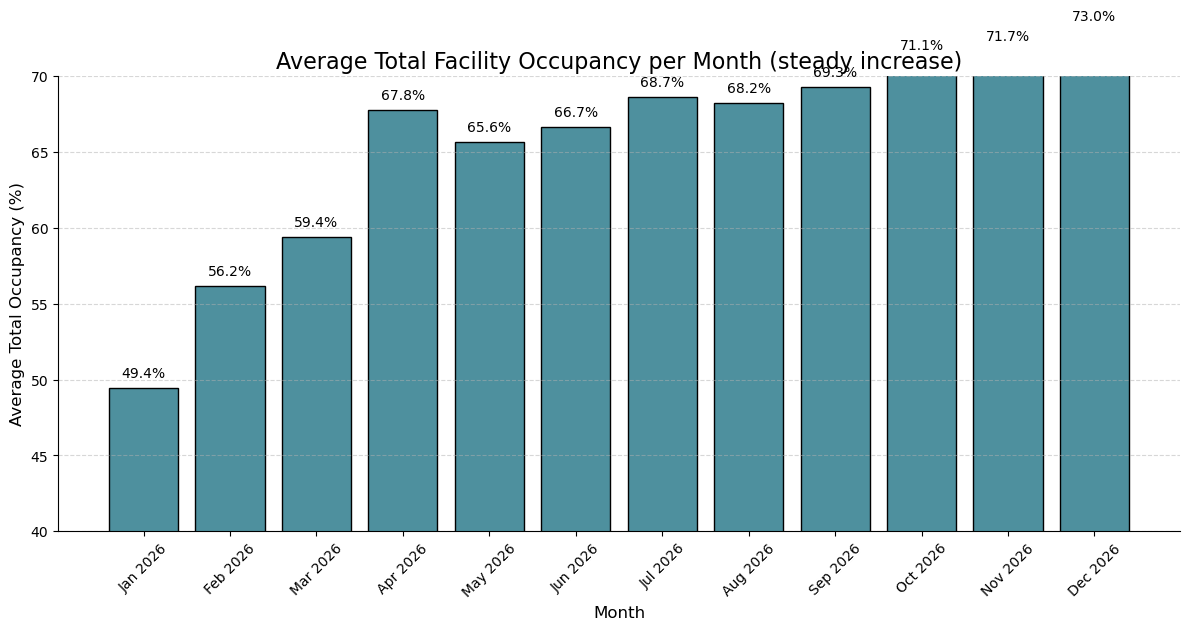

In [72]:

# --- Ensure datetime ---
df_hypo['Date'] = pd.to_datetime(df_hypo['Date'])

# --- Compute total occupancy across all lots per day ---
df_hypo['Total Occupied'] = (
    df_hypo['LOT 2 General Occupied'] + df_hypo['LOT 2 Premium Occupied'] +
    df_hypo['LOT 3 Occupied'] + df_hypo['LOT 4 General Occupied'] +
    df_hypo['LOT 4 Premium Occupied'] + df_hypo['LOT 5 Occupied'] +
    df_hypo['LOT 6 Occupied']
)

df_hypo['Total Spaces'] = (
    df_hypo['LOT 2 General Spaces'] + df_hypo['LOT 2 Premium Spaces'] +
    df_hypo['LOT 3 Spaces'] + df_hypo['LOT 4 General Spaces'] +
    df_hypo['LOT 4 Premium Spaces'] + df_hypo['LOT 5 Spaces'] +
    df_hypo['LOT 6 Spaces']
)

df_hypo['Total % Capacity'] = df_hypo['Total Occupied'] / df_hypo['Total Spaces']

# --- Group by month ---
df_hypo['Month'] = df_hypo['Date'].dt.to_period('M')
monthly_avg = df_hypo.groupby('Month')['Total % Capacity'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()
monthly_avg['Average %'] = monthly_avg['Total % Capacity'] * 100

# --- Plot ---
plt.figure(figsize=(12, 6))
bars = plt.bar(
    monthly_avg['Month'].dt.strftime('%b %Y'),
    monthly_avg['Average %'],
    color='#4e909e',
    edgecolor='black'
)

# --- Add percentage labels ---
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# --- Styling ---
plt.title("Average Total Facility Occupancy per Month (steady increase)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Occupancy (%)", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(40, 70)

# --- Save figure ---
plt.savefig(
    "avg_monthly_total_occupancy.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()


In [73]:
# --- Ensure datetime in both ---
df['Date'] = pd.to_datetime(df['Date'])
df_hypo['Date'] = pd.to_datetime(df_hypo['Date'])

# --- Compute total % capacity per month for original df ---
df['Total Occupied'] = (
    df['LOT 2 General Occupied'] + df['LOT 2 Premium Occupied'] +
    df['LOT 3 Occupied'] + df['LOT 4 General Occupied'] +
    df['LOT 4 Premium Occupied'] + df['LOT 5 Occupied'] +
    df['LOT 6 Occupied']
)
df['Total Spaces'] = (
    df['LOT 2 General Spaces'] + df['LOT 2 Premium Spaces'] +
    df['LOT 3 Spaces'] + df['LOT 4 General Spaces'] +
    df['LOT 4 Premium Spaces'] + df['LOT 5 Spaces'] +
    df['LOT 6 Spaces']
)
df['Total % Capacity'] = df['Total Occupied'] / df['Total Spaces']
monthly_orig = df.groupby(df['Date'].dt.to_period('M'))['Total % Capacity'].mean().reset_index()
monthly_orig['Month'] = monthly_orig['Date'].dt.to_timestamp()

# --- Compute total % capacity per month for hypothetical df ---
df_hypo['Total Occupied'] = (
    df_hypo['LOT 2 General Occupied'] + df_hypo['LOT 2 Premium Occupied'] +
    df_hypo['LOT 3 Occupied'] + df_hypo['LOT 4 General Occupied'] +
    df_hypo['LOT 4 Premium Occupied'] + df_hypo['LOT 5 Occupied'] +
    df_hypo['LOT 6 Occupied']
)
df_hypo['Total Spaces'] = (
    df_hypo['LOT 2 General Spaces'] + df_hypo['LOT 2 Premium Spaces'] +
    df_hypo['LOT 3 Spaces'] + df_hypo['LOT 4 General Spaces'] +
    df_hypo['LOT 4 Premium Spaces'] + df_hypo['LOT 5 Spaces'] +
    df_hypo['LOT 6 Spaces']
)
df_hypo['Total % Capacity'] = df_hypo['Total Occupied'] / df_hypo['Total Spaces']
monthly_hypo = df_hypo.groupby(df_hypo['Date'].dt.to_period('M'))['Total % Capacity'].mean().reset_index()
monthly_hypo['Month'] = monthly_hypo['Date'].dt.to_timestamp()

# --- Merge and compute percent difference ---
monthly_compare = monthly_orig.merge(
    monthly_hypo,
    on='Month',
    suffixes=('_orig', '_hypo')
)

monthly_compare['Percent Diff'] = (
    (monthly_compare['Total % Capacity_hypo'] - monthly_compare['Total % Capacity_orig'])
    / monthly_compare['Total % Capacity_orig'] * 100
)

# --- Display ---
monthly_compare[['Month', 'Total % Capacity_orig', 'Total % Capacity_hypo', 'Percent Diff']]


,Month,Total % Capacity_orig,Total % Capacity_hypo,Percent Diff
0,2026-01-01,0.494319,0.494319,0.0
1,2026-02-01,0.550613,0.561625,2.0
2,2026-03-01,0.571309,0.594162,4.0
3,2026-04-01,0.639365,0.677727,6.0
4,2026-05-01,0.607779,0.656402,8.0
5,2026-06-01,0.605929,0.666522,10.0
6,2026-07-01,0.613072,0.686640,12.0
7,2026-08-01,0.598610,0.682415,14.0
8,2026-09-01,0.597641,0.693264,16.0
9,2026-10-01,0.602237,0.710639,18.0


[0 1 3 4 6]
[2 5]
[0 1 2 4 6]
[3 5]
[0 1 4]
[2 3 5 6]
[0 1 3 4]
[2 5 6]


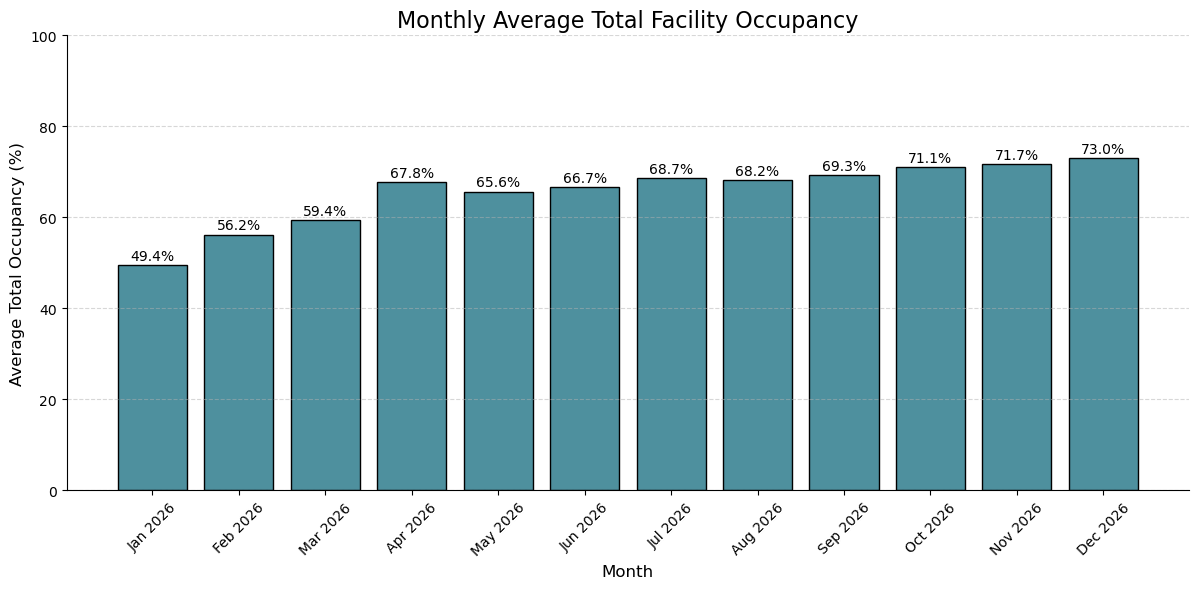

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Copy your dataframe ---
df_hypo_converge = df_hypo.copy()
df_hypo_converge['Date'] = pd.to_datetime(df_hypo_converge['Date'])

# --- Optional: define lot columns if needed ---
lot_occ_cols = [
    'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
    'LOT 3 Occupied', 'LOT 4 General Occupied',
    'LOT 4 Premium Occupied', 'LOT 5 Occupied',
    'LOT 6 Occupied'
]

lot_space_cols = [
    'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
    'LOT 3 Spaces', 'LOT 4 General Spaces',
    'LOT 4 Premium Spaces', 'LOT 5 Spaces',
    'LOT 6 Spaces'
]

# --- Your occupancy calculation goes here ---
# e.g., you might adjust lot occupancies or total % capacity
# df_plot['Total % Capacity'] = ...

strength = 0.0005

# --- Compute space ratios once ---
spaces_array = df_hypo_converge[lot_space_cols].iloc[0].values  # assuming lot spaces are constant per lot
space_ratios = spaces_array / spaces_array.sum()  # ratio of each lot to total spaces


for i in range(len(df_hypo_converge)):
       # --- Per row adjustment based on lots above/below average ---
    occ = df_hypo_converge.loc[i, lot_occ_cols].values
    spaces = df_hypo_converge.loc[i, lot_space_cols].values
    total_occ = occ.sum()
    total_spaces = spaces.sum()
    
    # Current total % for this row
    current_total_pct = total_occ / total_spaces
    
    # --- Identify lots above/below current total % ---
    lot_pcts = occ / spaces
    above_idx = np.where(lot_pcts > current_total_pct)[0]
    below_idx = np.where(lot_pcts <= current_total_pct)[0]

    if (i % 100 == 0):
        print(above_idx)
        print(below_idx)
    
    # Count of lots above and below
    num_above = len(above_idx)
    num_below = len(below_idx)
    
    # --- Subtract 1% from each lot above average ---
    reduction = strength * spaces[above_idx]  # 1% of each lot's capacity
    occ[above_idx] -= reduction
    total_reduction = reduction.sum()
    
    # Redistribute equally among below-average lots
    if len(below_idx) > 0:
        increase_per_lot = total_reduction / len(below_idx)
        occ[below_idx] += increase_per_lot

    
    # --- Save back ---
    df_hypo_converge.loc[i, lot_occ_cols] = occ
    df_hypo_converge.loc[i, 'Total % Capacity'] = occ.sum() / total_spaces


    #increase_power
    strength += 0.0005
# --- Monthly averages ---
df_hypo_converge['Month'] = df_hypo_converge['Date'].dt.to_period('M')
monthly_avg = df_hypo_converge.groupby('Month')['Total % Capacity'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()
monthly_avg['Average %'] = monthly_avg['Total % Capacity'] * 100

# --- Plot ---
plt.figure(figsize=(12,6))
bars = plt.bar(
    monthly_avg['Month'].dt.strftime('%b %Y'),
    monthly_avg['Average %'],
    color='#4e909e',
    edgecolor='black'
)

# Add value labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Monthly Average Total Facility Occupancy", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Occupancy (%)", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(0, 100)  # adjust as needed
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helper: compute weighted yearly lot averages ---
def compute_lot_averages(df):
    lot_occ_cols = [
        'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
        'LOT 3 Occupied', 'LOT 4 General Occupied',
        'LOT 4 Premium Occupied', 'LOT 5 Occupied',
        'LOT 6 Occupied'
    ]
    lot_space_cols = [
        'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
        'LOT 3 Spaces', 'LOT 4 General Spaces',
        'LOT 4 Premium Spaces', 'LOT 5 Spaces',
        'LOT 6 Spaces'
    ]
    
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Compute weighted % capacity per lot across all rows
    weighted_pcts = {}
    for occ_col, space_col in zip(lot_occ_cols, lot_space_cols):
        total_occ = df[occ_col].sum()
        total_space = df[space_col].sum()
        weighted_pcts[occ_col.replace('Occupied', '% Capacity')] = (total_occ / total_space) * 100
    
    # Compute total facility % capacity correctly
    total_occ_all = df[lot_occ_cols].sum().sum()
    total_space_all = df[lot_space_cols].sum().sum()
    total_avg = (total_occ_all / total_space_all) * 100
    
    weighted_pcts['Total Average'] = total_avg
    return pd.Series(weighted_pcts)

# --- Compute averages for each dataset ---
avg_df = compute_lot_averages(df)
avg_hypo = compute_lot_averages(df_hypo)
avg_converge = compute_lot_averages(df_hypo_converge)

# --- Plot setup ---
fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharey=True)

datasets = [
    (avg_df, "Original Facility Occupancy per Lot (Actual)"),
    (avg_hypo, "Hypothetical Facility Occupancy per Lot"),
    (avg_converge, "Converged (Streamlined) Facility Occupancy per Lot")
]

bar_color = "#4e909e"
avg_color = "#b0cbce"
edge_color = "black"

for ax, (avg, title) in zip(axes, datasets):
    colors = [bar_color] * (len(avg) - 1) + [avg_color]
    bars = ax.bar(avg.index, avg.values, color=colors, edgecolor=edge_color)
    
    # Add labels
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.6,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10
        )
    
    # Tick labels
    ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in bars])
    ax.set_xticklabels(avg.index, rotation=45, ha='right')
    
    ax.set_title(title, fontsize=14, fontweight='normal')
    ax.set_ylabel("Average Occupancy (%)", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    sns.despine(ax=ax)
    ax.set_ylim(40, 100)

plt.tight_layout()
plt.savefig("lot_facility_comparison_yearly_with_total.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Sum total occupied across all rows for original df_hypo
total_original_occ = df_hypo[lot_occ_cols].sum().sum()

# Sum total occupied across all rows for df_hypo_converge
total_converge_occ = df_hypo_converge[lot_occ_cols].sum().sum()

print(f"Total occupied in original df_hypo: {total_original_occ}")
print(f"Total occupied in df_hypo_converge: {total_converge_occ}")
print(f"Difference: {total_converge_occ - total_original_occ}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helper: compute weighted yearly lot averages ---
def compute_lot_averages(df):
    lot_occ_cols = [
        'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
        'LOT 3 Occupied', 'LOT 4 General Occupied',
        'LOT 4 Premium Occupied', 'LOT 5 Occupied',
        'LOT 6 Occupied'
    ]
    lot_space_cols = [
        'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
        'LOT 3 Spaces', 'LOT 4 General Spaces',
        'LOT 4 Premium Spaces', 'LOT 5 Spaces',
        'LOT 6 Spaces'
    ]
    
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Compute weighted % capacity per lot
    weighted_pcts = {}
    for occ_col, space_col in zip(lot_occ_cols, lot_space_cols):
        total_occ = df[occ_col].sum()
        total_space = df[space_col].sum()
        weighted_pcts[occ_col.replace('Occupied', '% Capacity')] = (total_occ / total_space) * 100
    
    # Compute total facility % capacity
    total_occ_all = df[lot_occ_cols].sum().sum()
    total_space_all = df[lot_space_cols].sum().sum()
    weighted_pcts['Total Average'] = (total_occ_all / total_space_all) * 100
    
    return pd.Series(weighted_pcts)

# --- Compute averages for the two datasets ---
avg_df = compute_lot_averages(df)
avg_converge = compute_lot_averages(df_hypo_converge)

# --- Plot setup ---
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharey=True)

datasets = [
    (avg_df, "Simulated Occupancy per Lot (No change)"),
    (avg_converge, "Expected Occupancy after Increased Convergence and Usage")
]

bar_color = "#4e909e"
avg_color = "#b0cbce"
edge_color = "black"

for ax, (avg, title) in zip(axes, datasets):
    colors = [bar_color] * (len(avg) - 1) + [avg_color]
    bars = ax.bar(avg.index, avg.values, color=colors, edgecolor=edge_color)
    
    # Add labels
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.6,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10
        )
    
    # Tick labels
    ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in bars])
    ax.set_xticklabels(avg.index, rotation=45, ha='right')
    
    ax.set_title(title, fontsize=14, fontweight='normal')
    ax.set_ylabel("Average Occupancy (%)", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    sns.despine(ax=ax)
    ax.set_ylim(30, 100)

plt.tight_layout()
plt.savefig("lot_facility_comparison_actual_vs_expected.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helper: compute weighted yearly lot averages (including Premiums) ---
def compute_lot_averages(df):
    lot_occ_cols = [
        'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
        'LOT 3 Occupied', 'LOT 4 General Occupied',
        'LOT 4 Premium Occupied', 'LOT 5 Occupied',
        'LOT 6 Occupied'
    ]
    lot_space_cols = [
        'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
        'LOT 3 Spaces', 'LOT 4 General Spaces',
        'LOT 4 Premium Spaces', 'LOT 5 Spaces',
        'LOT 6 Spaces'
    ]
    
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    
    weighted_pcts = {}
    for occ_col, space_col in zip(lot_occ_cols, lot_space_cols):
        total_occ = df[occ_col].sum()
        total_space = df[space_col].sum()
        weighted_pcts[occ_col.replace('Occupied', '% Capacity')] = (total_occ / total_space) * 100
    
    total_occ_all = df[lot_occ_cols].sum().sum()
    total_space_all = df[lot_space_cols].sum().sum()
    weighted_pcts['Total Average'] = (total_occ_all / total_space_all) * 100
    
    return pd.Series(weighted_pcts)

# --- Compute averages for both datasets ---
avg_actual = compute_lot_averages(df)
avg_expected = compute_lot_averages(df_hypo_converge)

# --- Compute differences from each dataset’s total average ---
def compute_diff_from_total(avg_series):
    total = avg_series['Total Average']
    diffs = avg_series.drop('Total Average') - total
    return diffs

diff_actual = compute_diff_from_total(avg_actual)
diff_expected = compute_diff_from_total(avg_expected)

# --- Prepare combined DataFrame for plotting ---
diff_df = pd.DataFrame({
    'Actual Difference': diff_actual,
    'Expected Difference': diff_expected
})

# --- Plot setup ---
plt.figure(figsize=(12, 6))
ax = diff_df.plot(kind='bar', figsize=(12, 6), color=['#4e909e', '#b0cbce'], edgecolor='black')

plt.axhline(0, color='black', linewidth=1)
plt.title("Difference from Total Average Occupancy per Lot (Including Premiums)", fontsize=14, weight='bold')
plt.ylabel("Difference from Total Average (%)")
plt.xlabel("Lot")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Scenario", loc='upper right')
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# --- Add labels on top of bars ---
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.savefig("lot_facility_difference_from_total_avg.png", dpi=300, bbox_inches='tight')
plt.show()
